# Predictive Analysis of Customer Visits Data

**Author:** ADEDIRAN, Yunus Kehinde

## Objective
1. The objective of this analysis is to build a predictive model to determine whether a customer will make a purchase on the website based on their visit data.
2. To compare the transforms performance on the predictive algorithm


## Dataset
The dataset contains 12,330 sessions of customer visits to the website.

### Features

**18 attributes** are present in the:
- **10 Numerical Attributes**
- **8 Categorical Attributes**

### Attribute Information
- **Revenue**: Class level. Possible values: **False** (did not buy) and **True** (made a purchase).
- **Administrative**: Number of administrative pages visited during the session.
- **Administrative Duration**: Total time spent on administrative pages in seconds.
- **Informational**: Number of informational pages visited during the session.
- **Informational Duration**: Total time spent on informational pages in seconds.
- **Product Related**: Number of product-related pages visited during the session.
- **Product Related Duration**: Total time spent on product-related pages in seconds.
- **Bounce Rate**: Percentage of visitors who leave the site after viewing only one page.
- **Exit Rate**: Percentage of exits on a specific page.
- **Page Value**: Average value of a web page prior to completing an e-commerce transaction.
- **Special Day**: Indicates the proximity of the visit date to a specific special day.
- **Operating System**: The operating system used by the visitor.
- **Browser**: The browser used to access the website.
- **Region**: Geographic region of the visitor.
- **Traffic Type**: Type of traffic (e.g., direct, referral).
- **Visitor Type**: Indicates whether the visitor is new or returning.
- **Weekend**: Boolean indicating whether the visit occurred on a weekend.
- **Month**: Month of the year during which the visit occurred.



In [ ]:
import sys
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
!pip install ucimlrepo

In [ ]:
# Data loading and EDA packages
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#statistical and ml model packages
import sklearn as sk
from scipy import stats
from scipy.stats import kruskal, mannwhitneyu, friedmanchisquare, f_oneway, ttest_ind,spearmanr, shapiro, levene
from sklearn.cluster import KMeans
import statsmodels.api as sm

# preprocessing packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# model packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# model evaluation packages
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


#### Data Loading fom UCI library

In [ ]:
# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) #pd.read_csv("online_shoppers_intention.csv") #

#### Data Inspection and Cleaning

In [ ]:
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df.sample(30)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1662,0,0.000000,0,0.000000,3,26.000000,0.000000,0.050000,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1001,4,387.500000,0,0.000000,23,666.946429,0.007692,0.026090,0.000000,0.0,Mar,1,1,6,10,Returning_Visitor,False,False
926,0,0.000000,0,0.000000,8,607.000000,0.037500,0.062500,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
7655,4,64.666667,0,0.000000,50,936.810000,0.000000,0.003774,0.000000,0.0,Aug,2,2,4,2,New_Visitor,False,False
6093,0,0.000000,0,0.000000,8,286.700000,0.050000,0.075000,0.000000,0.0,Jul,3,2,1,1,Returning_Visitor,False,False
1711,1,26.000000,1,55.000000,12,457.000000,0.014286,0.040476,0.000000,0.0,Mar,2,2,9,6,Returning_Visitor,True,False
12222,0,0.000000,0,0.000000,18,541.916667,0.000000,0.015686,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False
9315,0,0.000000,0,0.000000,38,1338.778571,0.011111,0.024533,0.000000,0.0,Nov,1,1,1,3,Returning_Visitor,True,False
8294,0,0.000000,2,12.000000,0,0.000000,0.000000,0.100000,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
9130,7,53.750000,5,199.000000,77,2194.490404,0.000000,0.010341,44.128618,0.0,Nov,2,2,2,2,Returning_Visitor,False,True


In [ ]:
df_copy = df.copy()

In [ ]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2627,2,48.000,0,0.0,24,543.750000,0.016000,0.040800,0.000000,0.8,May,2,2,3,2,Returning_Visitor,False,False
4208,0,0.000,0,0.0,18,473.750000,0.037500,0.046667,0.000000,0.6,May,3,2,6,3,Returning_Visitor,False,False
8286,0,0.000,0,0.0,68,1723.753711,0.011940,0.023682,0.000000,0.0,Nov,3,2,5,2,Returning_Visitor,False,False
4863,0,0.000,0,0.0,41,1271.333333,0.029268,0.047561,0.000000,0.4,May,2,2,1,13,Returning_Visitor,False,False
9667,3,40.500,0,0.0,20,758.750000,0.000000,0.020000,38.266679,0.0,Nov,2,2,8,3,Returning_Visitor,False,True
2487,0,0.000,0,0.0,69,653.277778,0.014706,0.053431,0.000000,0.6,May,2,4,7,4,Returning_Visitor,False,False
4473,1,6.400,0,0.0,13,135.000000,0.000000,0.005556,0.000000,0.0,May,3,2,3,4,Returning_Visitor,True,False
11999,5,89.625,2,11.5,31,1063.420238,0.011111,0.019962,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
8708,0,0.000,0,0.0,30,1661.833333,0.027222,0.071667,0.000000,0.0,Dec,2,2,3,1,Returning_Visitor,False,False
8866,5,231.750,0,0.0,30,805.783333,0.000000,0.020313,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df_copy['OperatingSystems'] = df_copy['OperatingSystems'].astype('category')
df_copy['Browser'] = df_copy['Browser'].astype('category')
df_copy['Region'] = df_copy['Region'].astype('category')
df_copy['TrafficType'] = df_copy['TrafficType'].astype('category')
df_copy['VisitorType'] = df_copy['VisitorType'].astype('category')
df_copy['Month'] = df_copy['Month'].astype('category')


df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [ ]:

num_cols = df_copy.select_dtypes(include=['number']).columns.tolist()

cat_cols = df_copy.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()


##### Descriptive Statistics of Numerical Columns

In [ ]:
df_copy[num_cols].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


##### Descriptive Statistics of Categorical Columns

In [ ]:
df_copy[cat_cols].describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [ ]:
missing_values=df.isnull().sum()
missing_values

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


### Exploratory Data Analysis

In [ ]:
target_name = "Revenue"

In [ ]:
df_copy.Revenue.value_counts()

,count
Revenue,
False,10422
True,1908


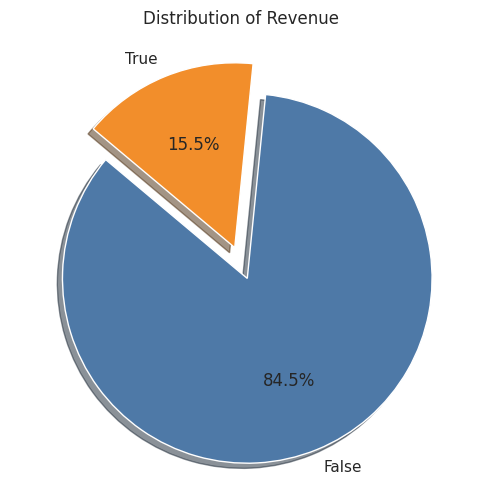

In [ ]:
revenue_counts = df['Revenue'].value_counts()
revenue_labels = ['False', 'True']
revenue_sizes = revenue_counts.values
revenue_percentages = [f'{value / len(df) * 100:.1f}%' for value in revenue_sizes]

explode = (0.09, 0.09)

plt.figure(figsize=(6, 6))
plt.pie(
    revenue_sizes,
    labels=revenue_labels,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    shadow=True,
    colors=['#4E79A7', '#F28E2B']
)


plt.title("Distribution of Revenue")
plt.show()

In [ ]:
custom_palette = sns.color_palette("Set2", n_colors=3)

sns.set_palette(custom_palette)


### Univariate Analysis

In [ ]:
def plot_categorical_univariate(df, categorical_features):
    sns.set(style="darkgrid")
    num_features = len(categorical_features)
    fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, num_features * 3))

    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        ax = sns.countplot(data=df, x=feature, ax=axes[i], palette='Pastel1')
        total = len(df)

        for p in ax.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            ax.annotate(f'{percentage:.1f}%',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10)

        axes[i].set_title(f'Count of {feature}', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


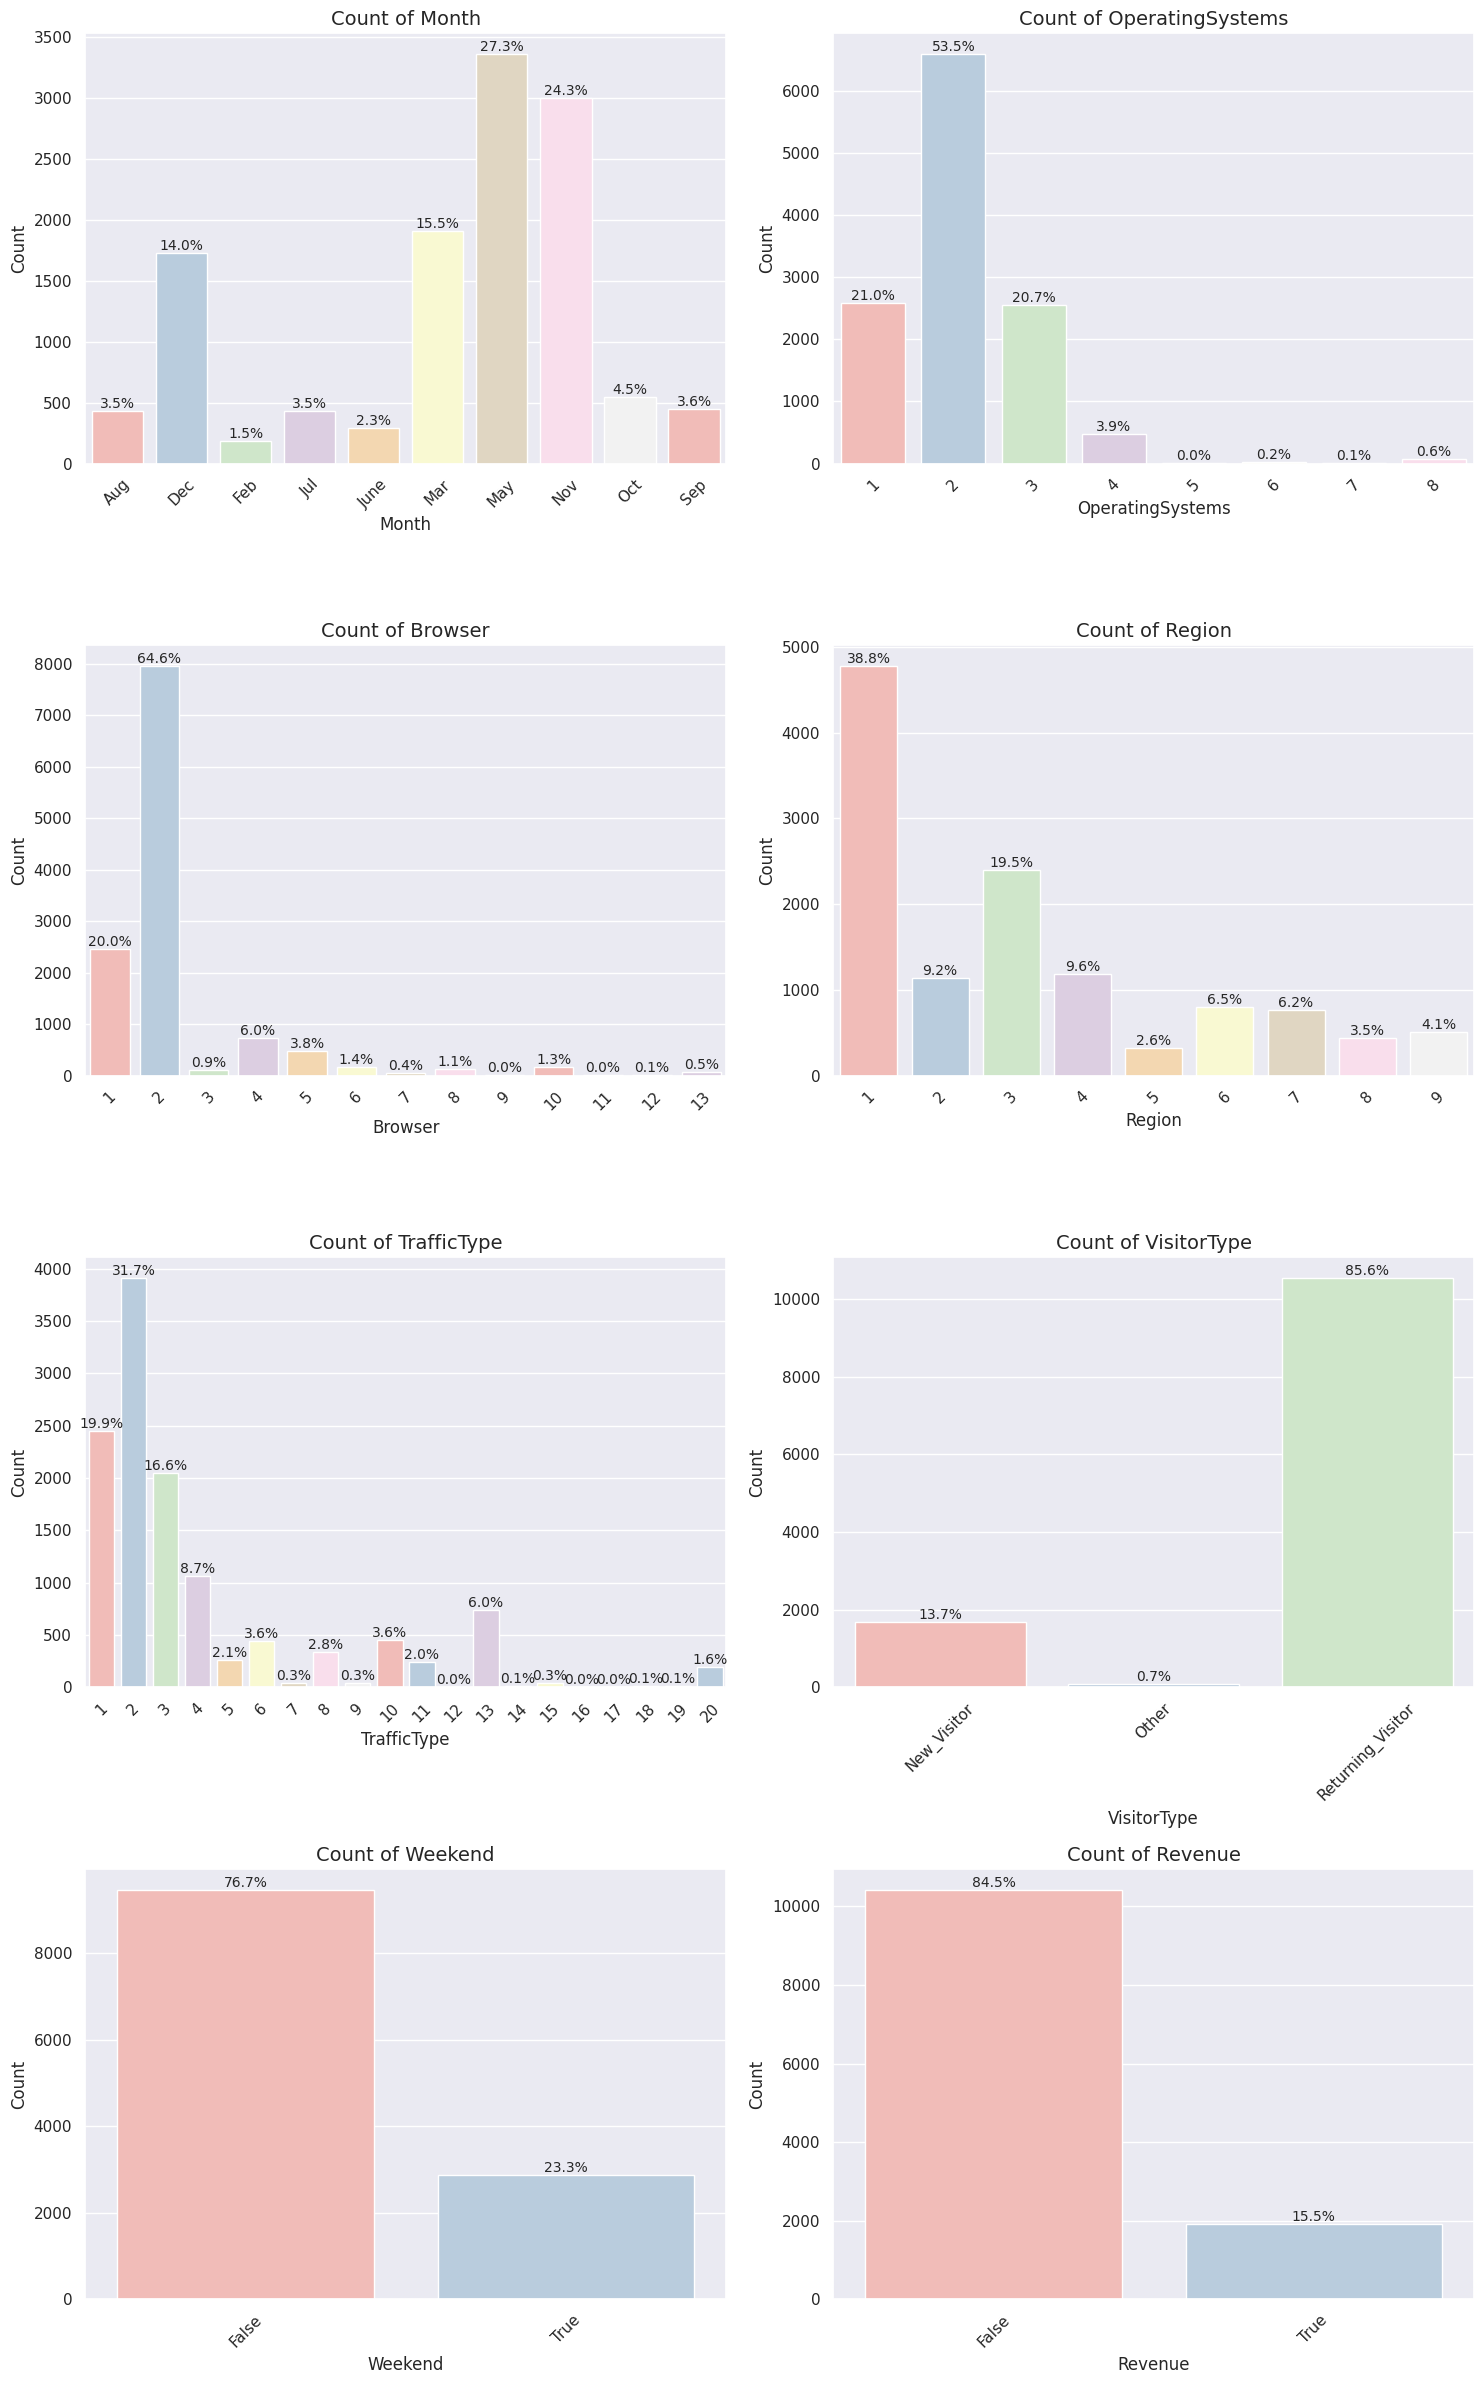

In [ ]:
plot_categorical_univariate(df_copy, cat_cols)

### Bivariate Analysis

In [ ]:
def categorical_plot(df, x: str, y:str):
    df[y] = df[y].astype(str)
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1)

    g.ax.set_ylim(0, 100)

    for p in g.ax.patches:
        txt = str(round(float(p.get_height()), 2)) + '%'
        txt_x = p.get_x() + p.get_width() / 2  # Center the text
        txt_y = p.get_height()
        g.ax.text(txt_x, txt_y, txt, ha='center', va='bottom')  # Align the text
    plt.show()


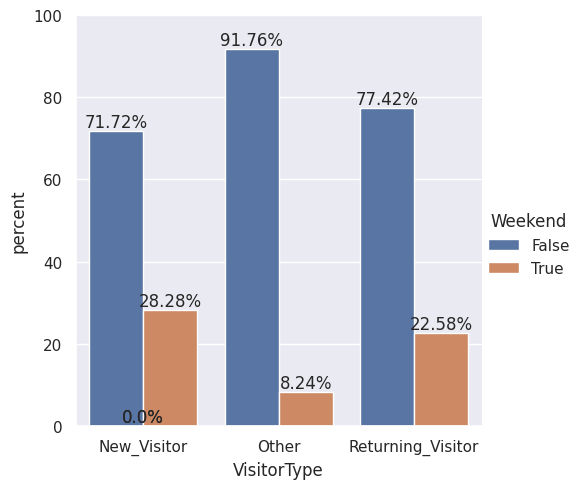

In [ ]:
x, y = 'VisitorType', 'Weekend'
categorical_plot(df, x, y)

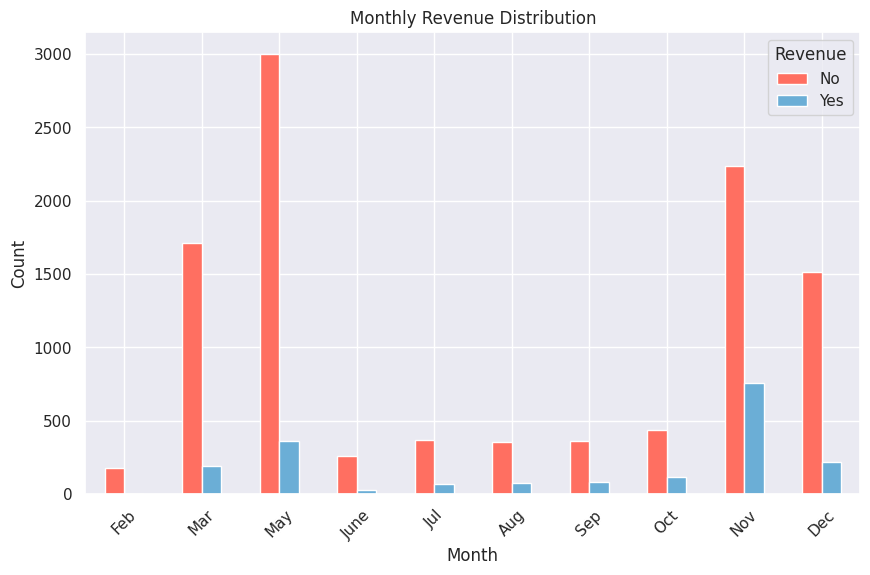

In [ ]:
months_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

monthly_revenue = df.groupby(['Month', 'Revenue']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', stacked=False, color=['#FF6F61', '#6BAED6'] , ax=plt.gca())
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue', labels=['No', 'Yes'])  # Adjust labels if needed
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with colors
def plot_histogram_vs_revenue(df, column):
    plt.figure(figsize=(4, 4))
    sns.histplot(data=df, x=column, hue='Revenue', multiple='stack', kde=True, palette='Set2')
    plt.title(f'Distribution of {column} by Revenue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Categorical plot with colors
def plot_categorical(df, categorical_column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_column, hue='Revenue', data=df, palette='Set2')
    plt.title(f'Count of {categorical_column} by Revenue')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')
    plt.legend(title='Revenue')
    plt.show()

# Boolean plot with colors
def plot_boolean(df, boolean_column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=boolean_column, hue='Revenue', data=df, palette='Set2')
    plt.title(f'Distribution of {boolean_column} by Revenue')
    plt.xlabel(boolean_column)
    plt.ylabel('Count')
    plt.legend(title='Revenue')
    plt.show()

# Dispatcher function
def plot_by_revenue(df):
    for column in df.columns:
        if column != 'Revenue':
            if df[column].dtype == 'float64' or df[column].dtype == 'int64':
                plot_histogram_vs_revenue(df, column)
            elif df[column].dtype == 'object':
                plot_categorical(df, column)
            elif df[column].dtype == 'bool':
                plot_boolean(df, column)

# Multiple histograms in subplots with color
def plot_histograms_vs_revenue(df, columns):
    fig, axes = plt.subplots(5, 2, figsize=(14, 20))
    fig.tight_layout(pad=5)

    for i, column in enumerate(columns[:10]):
        row, col = divmod(i, 2)
        sns.histplot(data=df, x=column, hue='Revenue', multiple='stack', kde=True, ax=axes[row, col], palette='Set2')
        axes[row, col].set_title(f'Distribution of {column} by Revenue')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')

    plt.show()


In [ ]:
len(num_cols)

10

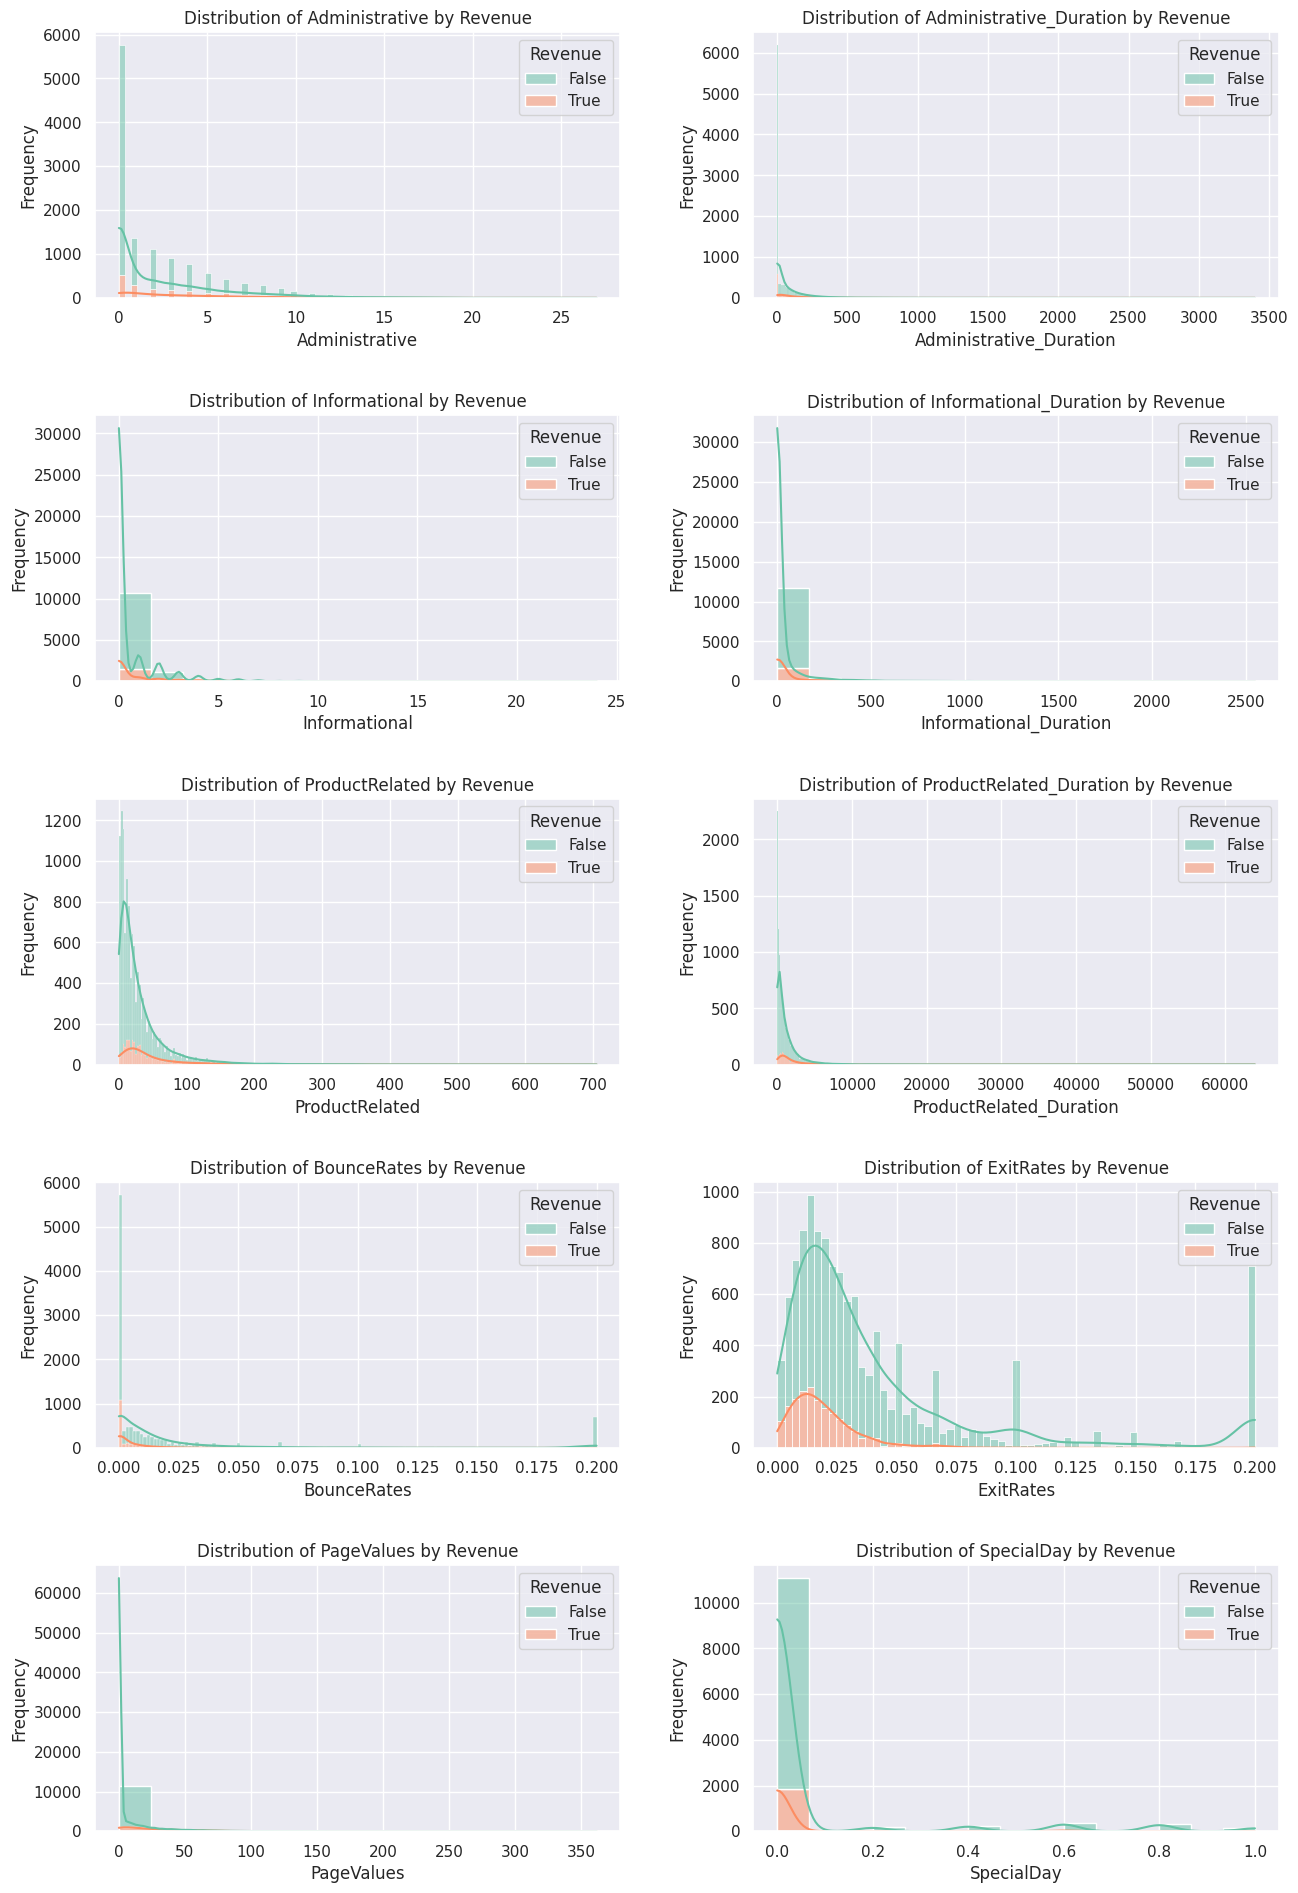

In [ ]:
plot_histograms_vs_revenue(df_copy, num_cols)

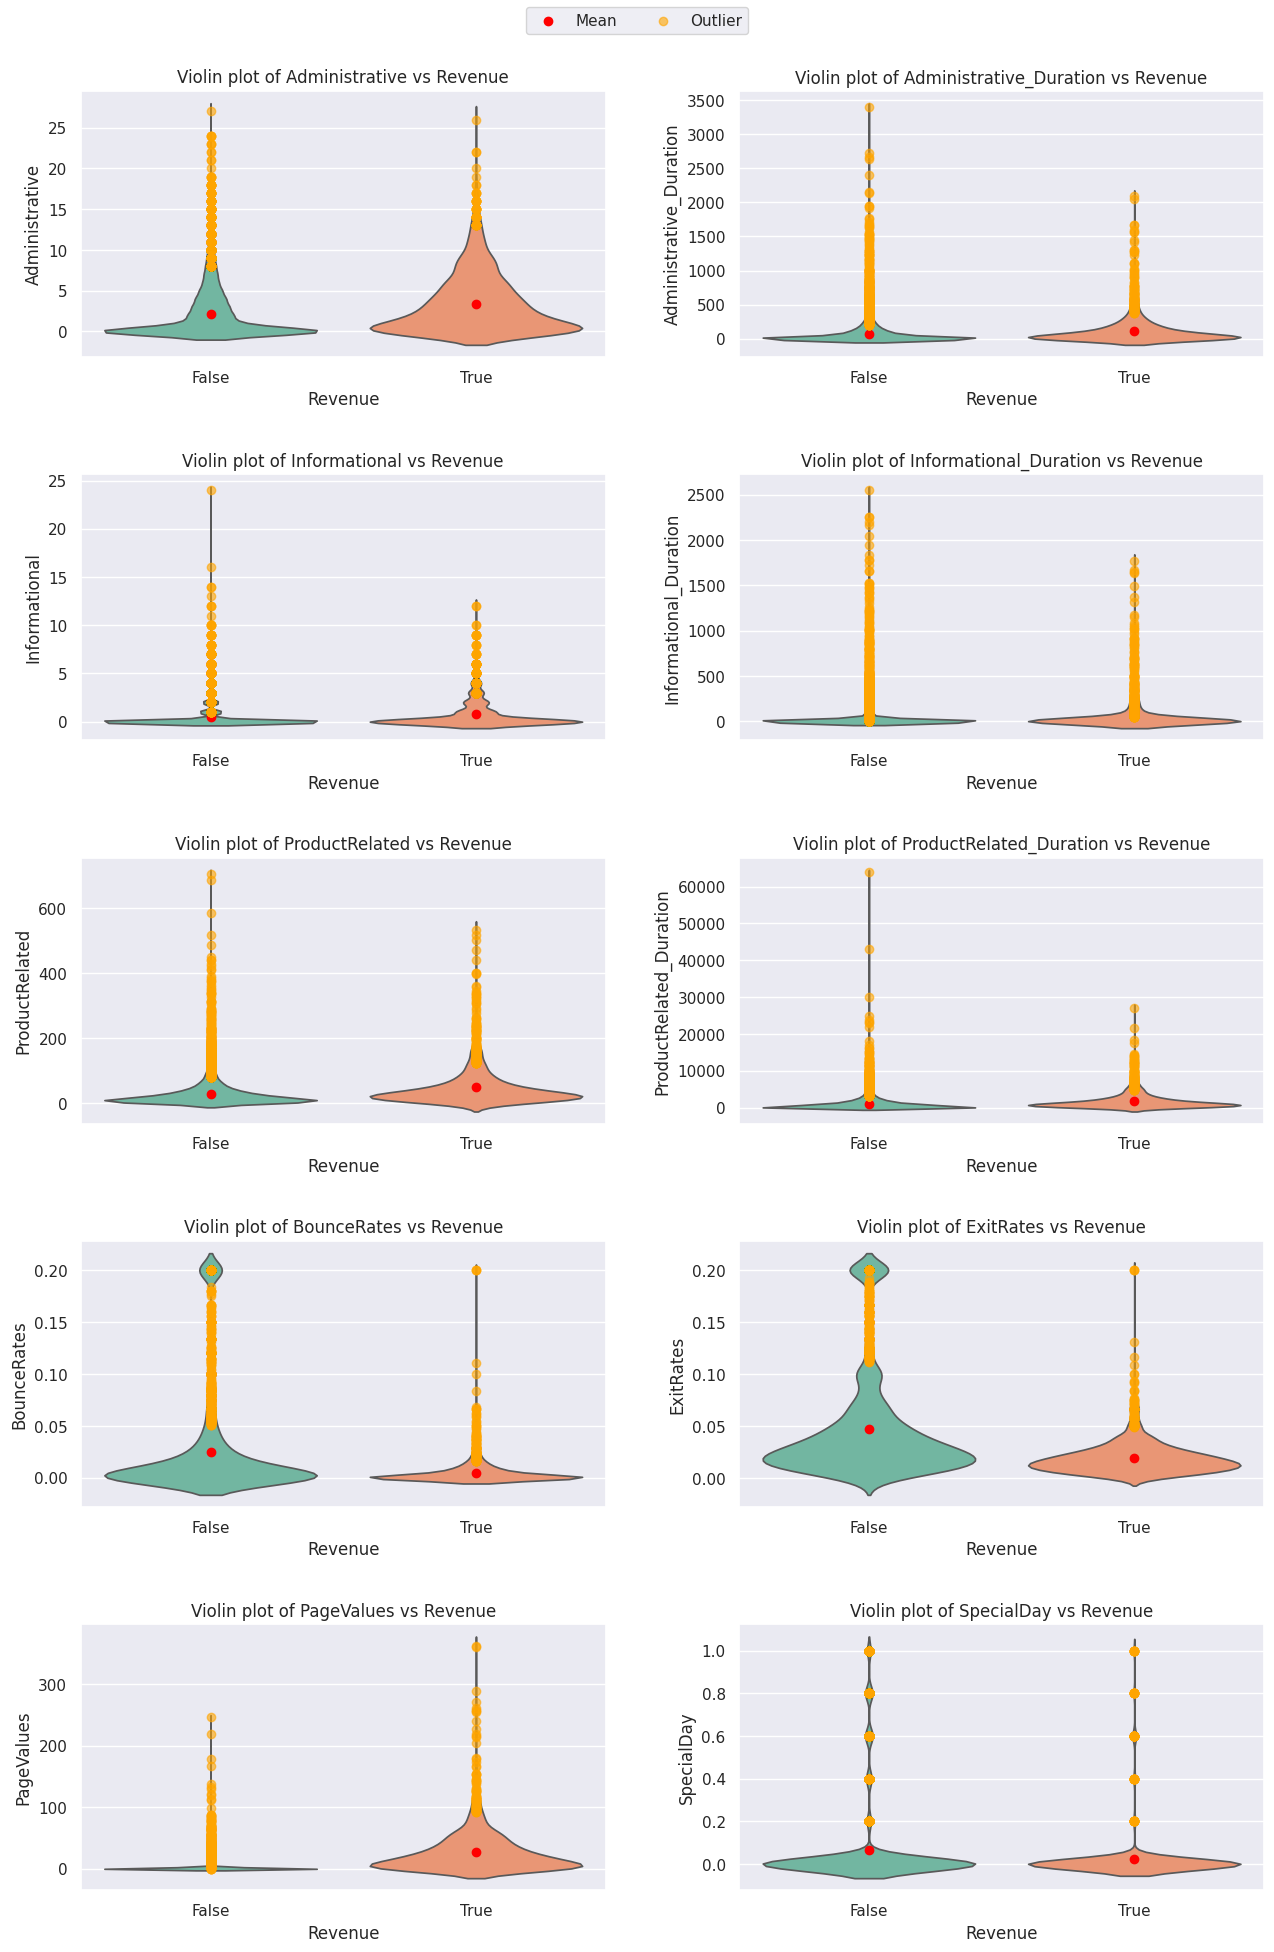

In [ ]:
def plot_violinplots_vs_revenue(df, columns):
    fig, axes = plt.subplots(5, 2, figsize=(14, 20))
    fig.tight_layout(pad=5)

    for i, column in enumerate(columns[:10]):
        row, col = divmod(i, 2)

        sns.violinplot(
            data=df,
            x='Revenue',
            y=column,
            ax=axes[row, col],
            inner=None,  # Removes default boxplot inside violin
            palette='Set2'
        )

        # Plot the group means
        means = df.groupby('Revenue')[column].mean()
        for idx, revenue in enumerate(means.index):
            axes[row, col].scatter(x=idx, y=means[revenue], color='red', label='Mean' if idx == 0 else "")

        # Optional: manually add outliers (like in your boxplot)
        for idx, (revenue, group_data) in enumerate(df.groupby('Revenue')[column]):
            q1 = np.percentile(group_data.dropna(), 25)
            q3 = np.percentile(group_data.dropna(), 75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]
            axes[row, col].scatter([idx] * len(outliers), outliers, color='orange', alpha=0.6, marker='o', label='Outlier' if idx == 0 else "")

        axes[row, col].set_title(f'Violin plot of {column} vs Revenue')
        axes[row, col].set_xlabel('Revenue')
        axes[row, col].set_ylabel(column)

    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2)
    plt.show()

plot_violinplots_vs_revenue(df_copy, num_cols)


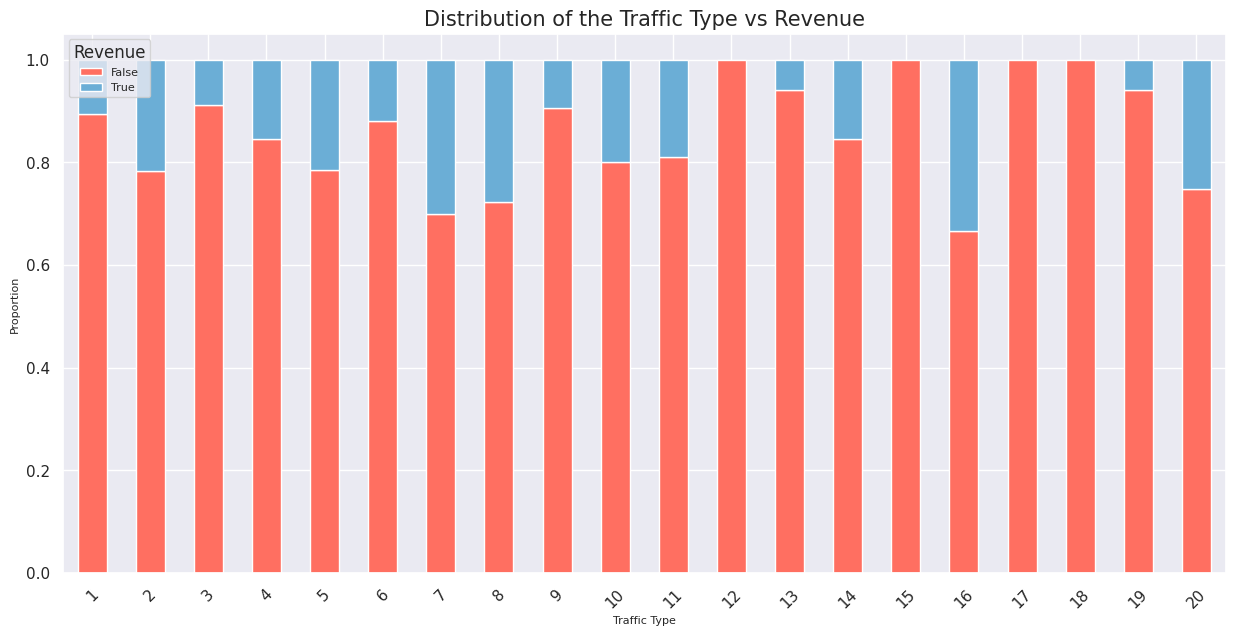

In [ ]:
df_traf = pd.crosstab(df['TrafficType'], df['Revenue'])
df_traf.div(df_traf.sum(1).astype(float), axis=0).plot(
    kind='bar',
    stacked=True,
    color=['#FF6F61', '#6BAED6']
)

plt.title('Distribution of the Traffic Type vs Revenue', fontsize=15)
plt.xlabel('Traffic Type', fontsize=8)
plt.ylabel('Proportion', fontsize=8)
plt.xticks(rotation=45)
plt.legend(title='Revenue', fontsize=8)
plt.show()

### Multivariate Analysis

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [ ]:
num_cols = df_copy.select_dtypes(include=['number']).columns
num_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

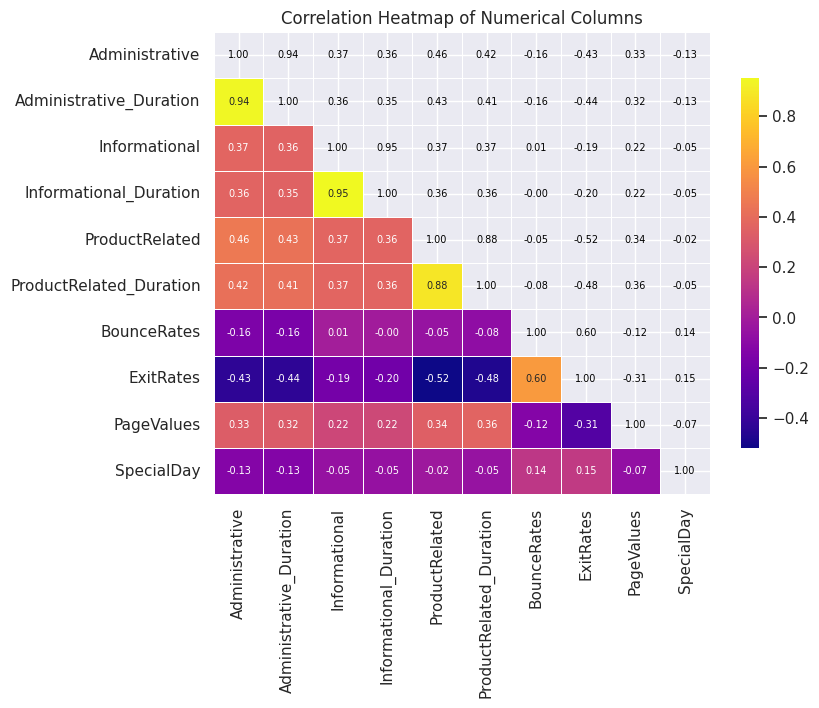

In [ ]:
correlation_matrix = df_copy[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='plasma', mask=mask, annot_kws={"size": 7}, fmt=".2f",
            cbar_kws={'shrink': .8}, linewidths=0.5)

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if mask[i, j]:
            plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}',
                     ha='center', va='center', color='black', fontsize=7)

plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

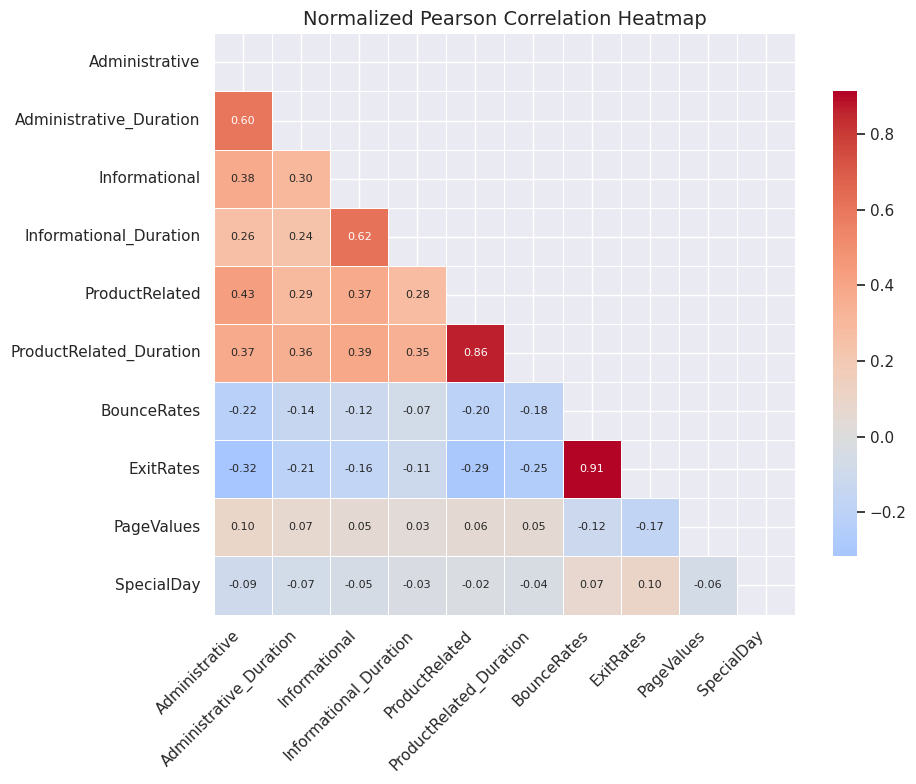

In [ ]:
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid changing original DataFrame
df_normalized = df_copy.copy()

# Select only numerical columns
numerical_cols = df_normalized.select_dtypes(include=['float64', 'int64']).columns

# Normalize
scaler = StandardScaler()
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

# Compute Pearson correlation
correlation_matrix = df_normalized[numerical_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    square=True,
    center=0
)

plt.title('Normalized Pearson Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


*Bounce Rate* and *Exit Rate* show a strong correlation, which may introduce redundancy into the model. To minimize this, we might remove one feature if its impact is significant. Conducting feature selection can help evaluate their importance and predictive value. Since the correlation is above 0.9, we should test the model’s performance after removing one to confirm that accuracy and interpretability remain intact.

Text(0.5, 1.0, 'Month vs Bounce Rates.')

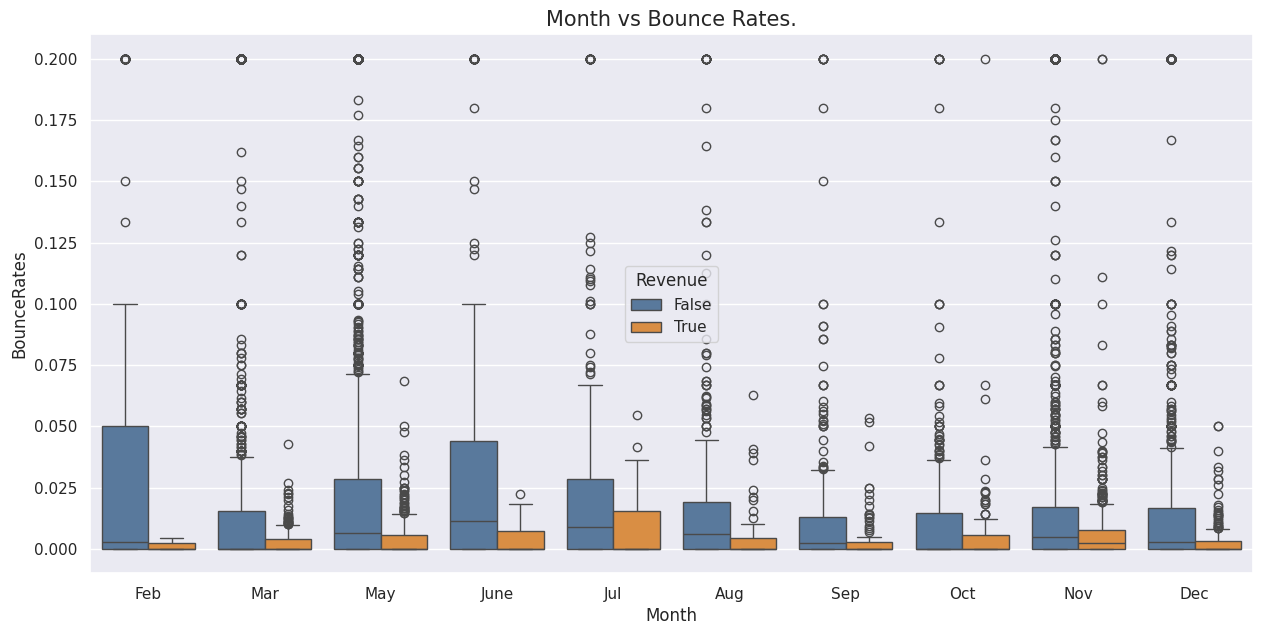

In [ ]:
# month vs bouncerates wrt revenue
custom_colors = ['#4E79A7', '#F28E2B']
sns.boxplot(x=df['Month'], y=df['BounceRates'], hue=df['Revenue'], palette=custom_colors)
plt.title('Month vs Bounce Rates.', fontsize=15)

In [ ]:
# Encoding categorical variables
label_encoders = {}
df_label_encoded = df_copy.copy()
for column in df_label_encoded.select_dtypes(include=['category','object', 'bool']).columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df_label_encoded.drop(columns='Revenue')
y = df_label_encoded['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model 1: Using both 'Bounce Rate' and 'Exit Rate'
model1 = RandomForestClassifier(random_state=0)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

# Model 2: Removing one of the correlated features ('Exit Rate')
X_train_reduced = X_train.drop(columns=['ExitRates'])
X_test_reduced = X_test.drop(columns=['ExitRates'])

model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train_reduced, y_train)
y_pred2 = model2.predict(X_test_reduced)
accuracy2 = accuracy_score(y_test, y_pred2)

# Model 2: Removing one of the correlated features ('Bounce Rate')
X_train_red = X_train.drop(columns=['BounceRates'])
X_test_red = X_test.drop(columns=['BounceRates'])

model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train_red, y_train)
y_pred3 = model3.predict(X_test_red)
accuracy3 = accuracy_score(y_test, y_pred3)

# Compare the performance
print("Model accuracy with both features:", accuracy1)
print("Model accuracy without 'Exit Rate':", accuracy2)
print("Model accuracy without 'Bounce Rate':", accuracy3)


Model accuracy with both features: 0.8937550689375506
Model accuracy without 'Exit Rate': 0.8915923222492566
Model accuracy without 'Bounce Rate': 0.8915923222492566


model with both features performed slightly better so we are dropping any one.

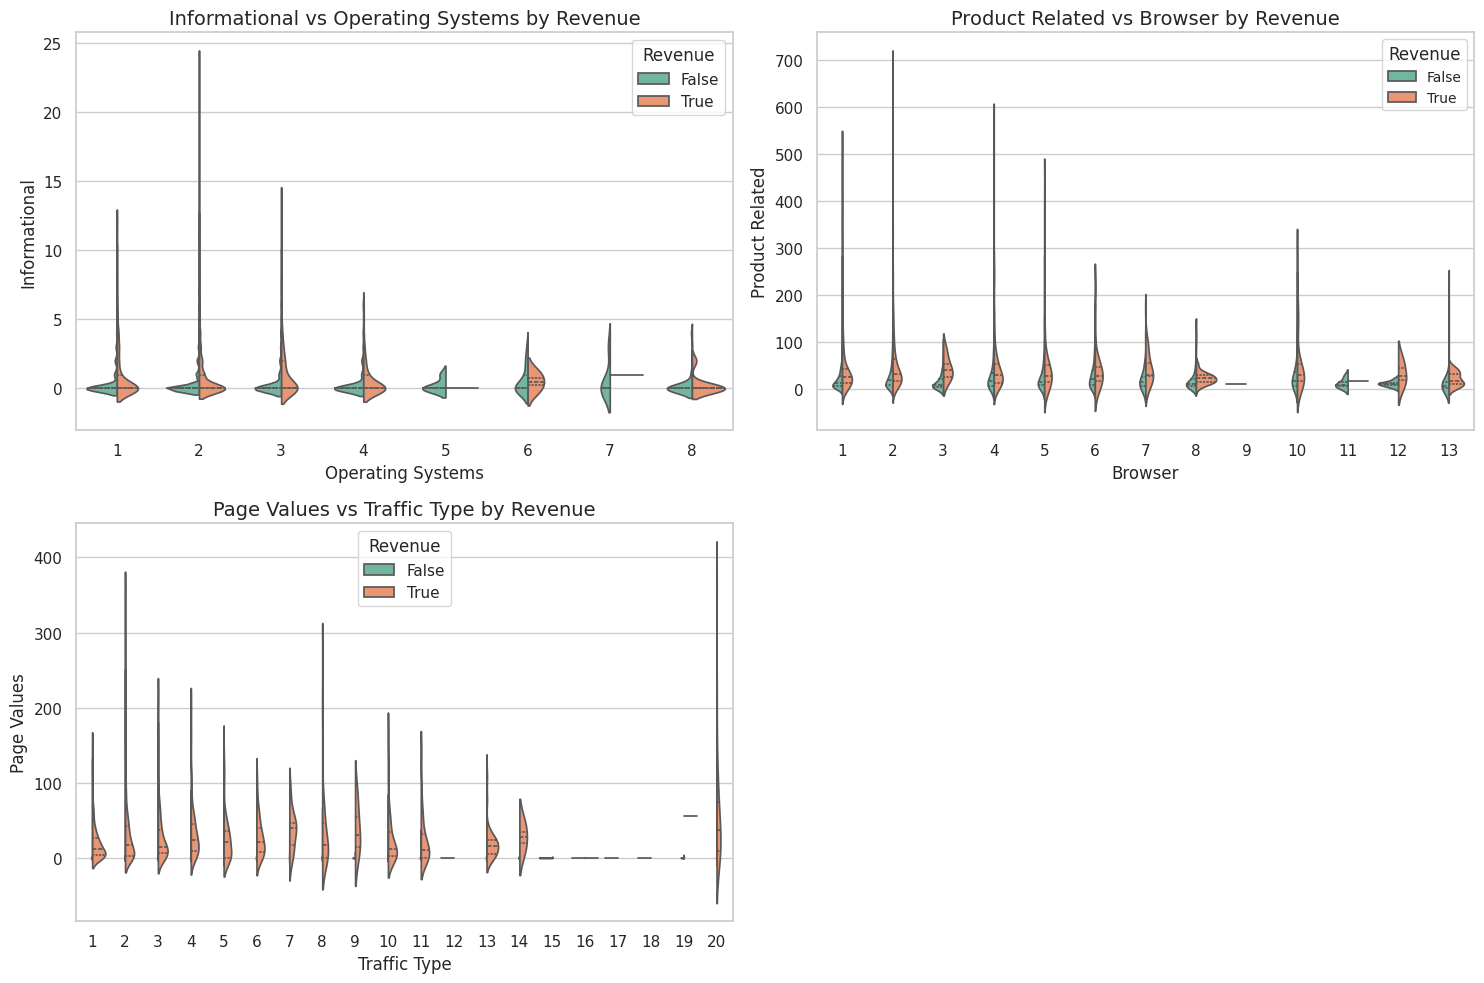

In [ ]:
def plot_violinplot(df):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    sns.violinplot(data=df, x='OperatingSystems', y='Informational', hue='Revenue',
                   ax=axes[0, 0], split=True, palette='Set2', inner="quartile")
    axes[0, 0].set_title('Informational vs Operating Systems by Revenue', fontsize=14)
    axes[0, 0].set_xlabel('Operating Systems', fontsize=12)
    axes[0, 0].set_ylabel('Informational', fontsize=12)

    sns.violinplot(data=df, x='Browser', y='ProductRelated', hue='Revenue',
                   ax=axes[0, 1], split=True, palette='Set2', inner="quartile")
    axes[0, 1].set_title('Product Related vs Browser by Revenue', fontsize=14)
    axes[0, 1].set_xlabel('Browser', fontsize=12)
    axes[0, 1].set_ylabel('Product Related', fontsize=12)

    sns.violinplot(data=df, x='TrafficType', y='PageValues', hue='Revenue',
                   ax=axes[1, 0], split=True, palette='Set2', inner="quartile")
    axes[1, 0].set_title('Page Values vs Traffic Type by Revenue', fontsize=14)
    axes[1, 0].set_xlabel('Traffic Type', fontsize=12)
    axes[1, 0].set_ylabel('Page Values', fontsize=12)

    # Remove empty subplot
    fig.delaxes(axes[1, 1])

    plt.tight_layout()
    axes[0, 1].legend(title='Revenue', loc='upper right', fontsize=10)
    plt.show()

# Call the function
plot_violinplot(df_copy)


<Axes: xlabel='Weekend', ylabel='PageValues'>

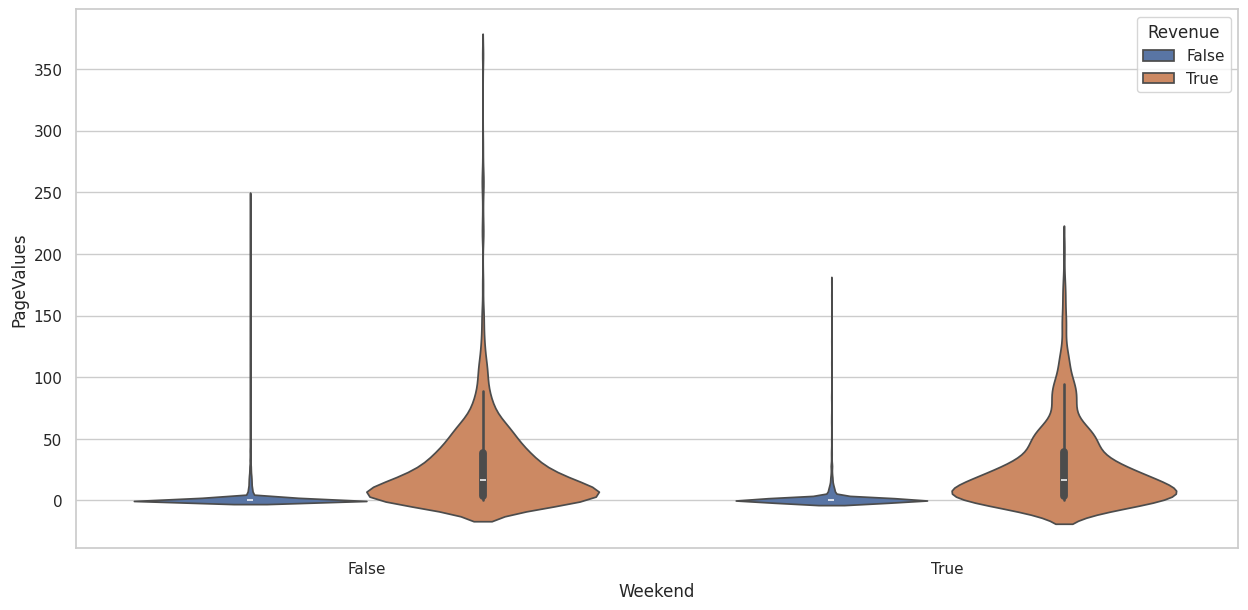

In [ ]:
sns.violinplot(x=df['Weekend'], y=df['PageValues'], hue=df['Revenue'])

Text(0.5, 1.0, 'Visitors vs BounceRates w.r.t. Rev.')

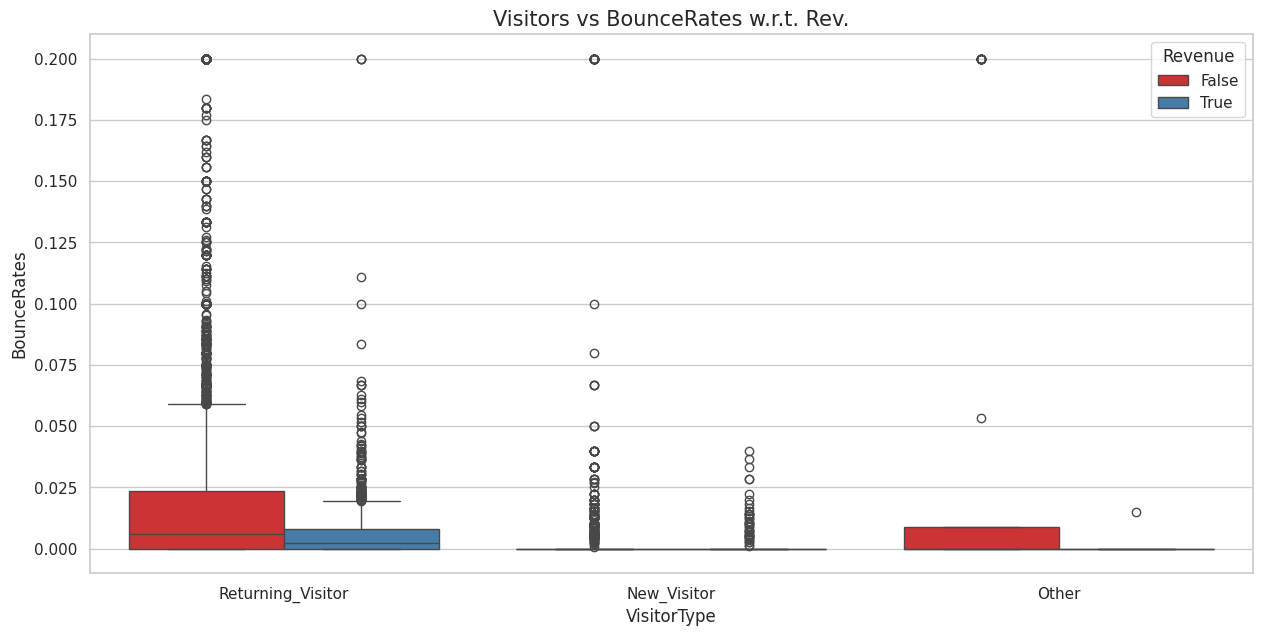

In [ ]:
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Set1')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize=15)

In [ ]:
df_copy.isnull().sum().sum()

np.int64(0)

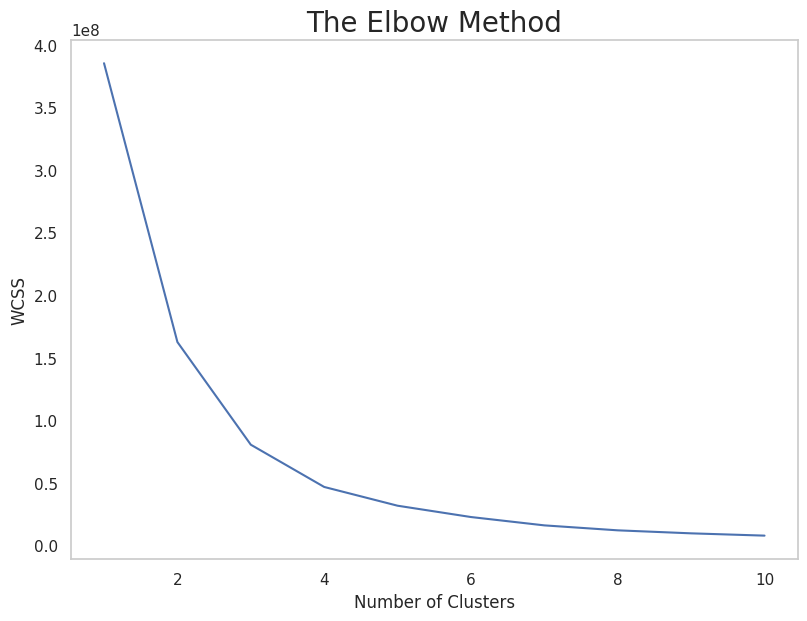

In [ ]:
x = df_copy.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape

plt.figure(figsize=(8, 6))
# Calculate WCSS for different cluster counts
wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm='elkan',
        tol=0.001
    )
    km.fit(x)

    # Get the cluster labels
    labels = km.labels_  # corrected to labels_

    # Append the within-cluster sum of squares (WCSS)
    wcss.append(km.inertia_)

# Plotting the elbow method
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


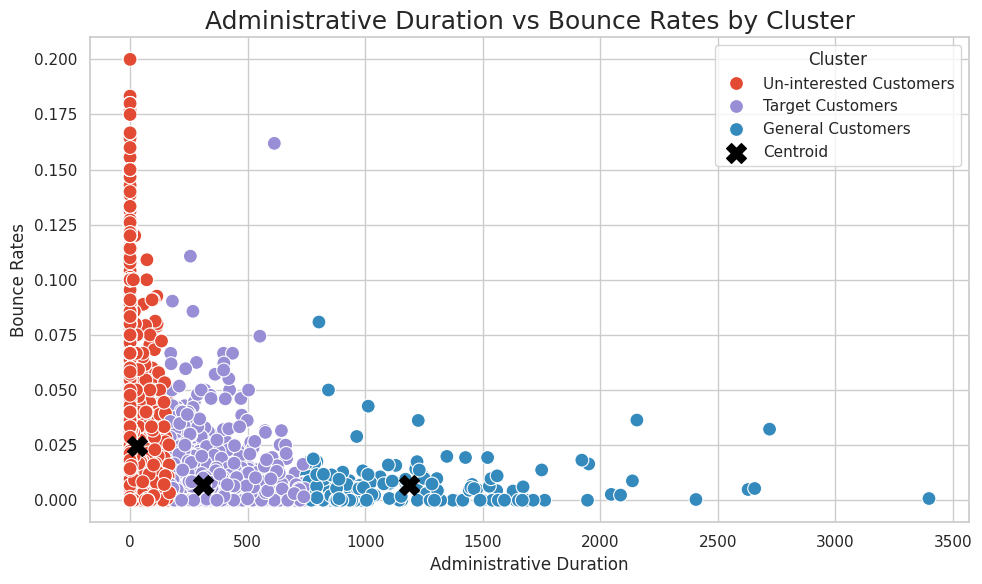

In [ ]:
x = df_copy.iloc[:, [1, 6]].values

# Apply KMeans clustering
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Convert to DataFrame for plotting
df_plot = pd.DataFrame(x, columns=['Administrative_Duration', 'BounceRates'])
df_plot['Cluster'] = y_means

# Map cluster labels to meaningful names
cluster_names = {0: 'Un-interested Customers', 1: 'General Customers', 2: 'Target Customers'}
df_plot['Cluster'] = df_plot['Cluster'].map(cluster_names)

# Define custom color palette for clusters
cluster_palette = {
    'Un-interested Customers': '#E24A33',
    'General Customers': '#348ABD',
    'Target Customers': '#988ED5'
}

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='Administrative_Duration',
    y='BounceRates',
    hue='Cluster',
    palette=cluster_palette,
    s=100,
    edgecolor='white'
)

# Plot centroids
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroid')

# Final touches
plt.title('Administrative Duration vs Bounce Rates by Cluster', fontsize=18)
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_copy.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2022,2,47.5,0,0.0,5,116.500000,0.0,0.005714,0.0,0.0,Mar,3,2,5,2,Returning_Visitor,True,False
936,0,0.0,0,0.0,5,161.333333,0.0,0.050000,0.0,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
9891,0,0.0,0,0.0,14,272.166667,0.0,0.025000,0.0,0.0,Dec,3,2,3,2,Returning_Visitor,False,False
439,3,50.0,0,0.0,13,796.000000,0.0,0.013333,0.0,0.0,Mar,2,2,5,2,Returning_Visitor,False,False
263,0,0.0,0,0.0,9,116.333333,0.0,0.066667,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


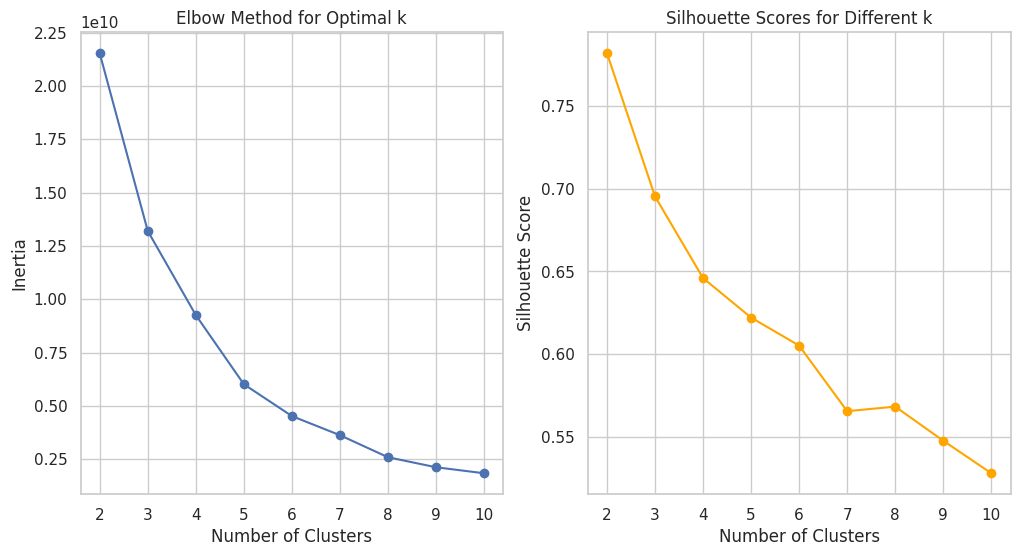

In [ ]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# Selecting relevant features for clustering
features = df[['Administrative_Duration','Informational_Duration', 'ProductRelated_Duration',
                'ExitRates', 'PageValues', 'SpecialDay']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


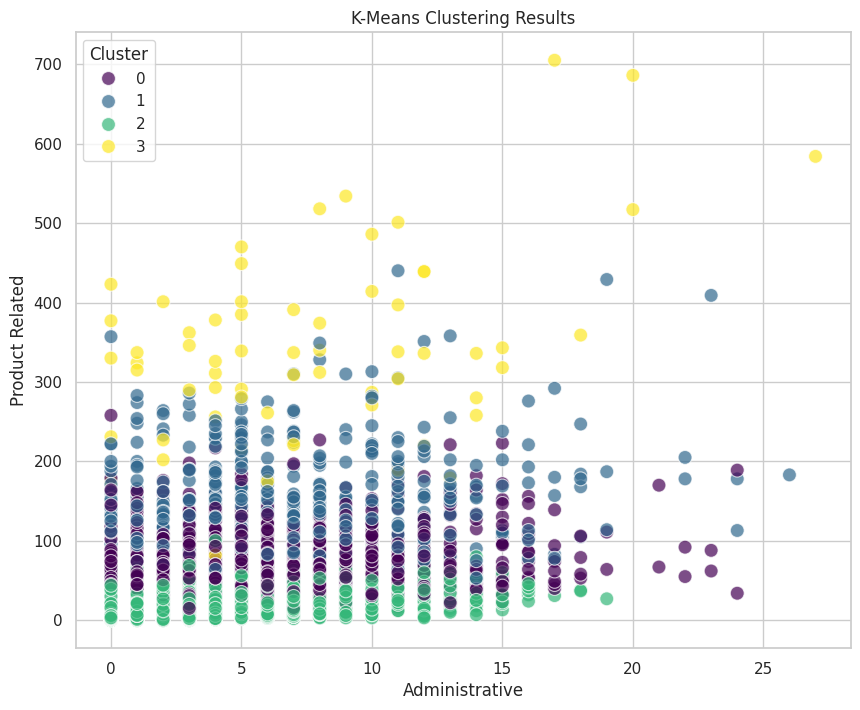

In [ ]:
# Choose the number of clusters based on the elbow method or silhouette score
optimal_clusters = 4  # Adjust based on your analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(features)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Administrative', y='ProductRelated', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering Results')
plt.xlabel('Administrative')
plt.ylabel('Product Related')
plt.legend(title='Cluster')
plt.show()

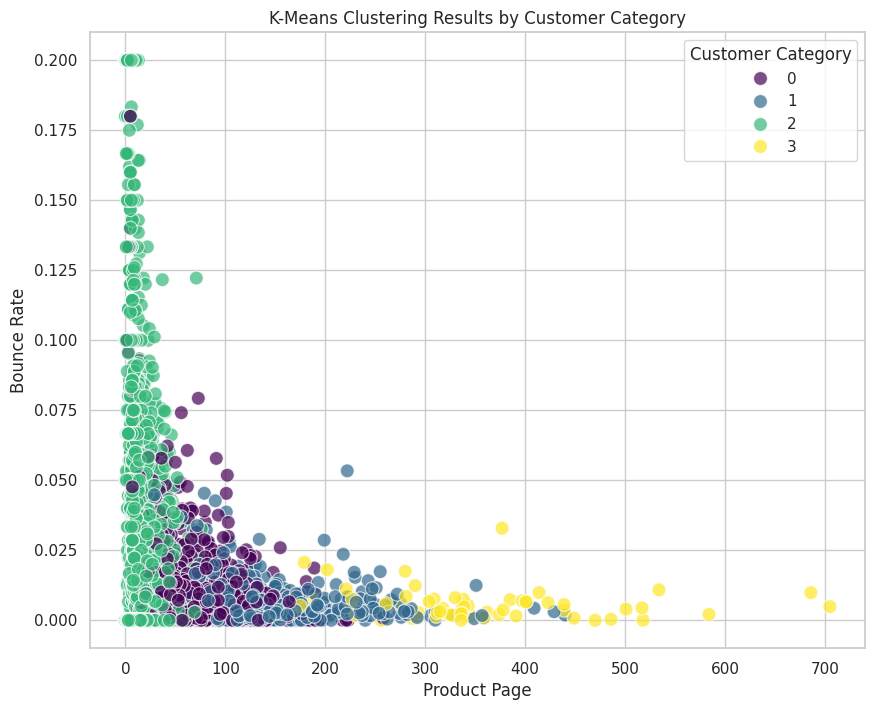

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ProductRelated', y='BounceRates', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering Results by Customer Category')
plt.xlabel('Product Page')
plt.ylabel('Bounce Rate')
plt.legend(title='Customer Category')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  int64   
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 non-null  int64   
 14  Traffi

### Preprocessing

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [ ]:
df_copy.Revenue.value_counts()

,count
Revenue,
False,10422
True,1908


In [ ]:
df_clean = df_copy.copy()

# Experiment Set-up

Preprocessing Steps
* Make a copy of the data
* Label Encodeing - Traffictype, BrowserType and Month are label encoded because high cardinality tendencies
* One hot encoding - the other categorical variable
* Pipeline for Hybrid sampling - SMOTE 60% oversampling and 80% undersampling according to the paper.
* MinMax Scaling numerical varibles because of the fact that most of the columns do not follow normal distribution upon visual inspection of distribution.
* Data Splitting

#### 1. ENCODING, DEFINE TRANSFORMS + SAMPLING

In [ ]:
#Label Encoding
le = LabelEncoder()
df_clean['Revenue'] = le.fit_transform(df_clean['Revenue'])
df_clean['TrafficType'] = le.fit_transform(df_clean['TrafficType'])
df_clean['Month'] = le.fit_transform(df_clean['Month'])
df_clean['Browser'] = le.fit_transform(df_clean['Browser'])

In [ ]:
df_copy.Revenue.value_counts()

,count
Revenue,
False,10422
True,1908


In [ ]:
df_clean['Month'].value_counts()

,count
Month,
6,3364
7,2998
5,1907
1,1727
8,549
9,448
0,433
3,432
4,288


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  int64   
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 non-null  category
 14  Traffi

In [ ]:
# one hot encoding
data1 = pd.get_dummies(df_clean)
data1.columns
#Remember: to Smote

print(df_clean['Revenue'].value_counts())
x=data1
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Revenue
0    10422
1     1908
Name: count, dtype: int64
Shape of x: (12330, 34)
Shape of y: (12330,)


In [ ]:
numerical_transforms = {
    'standard_scaler': StandardScaler(),
    'minmax_scaler': MinMaxScaler(),
    'robust_scaler': RobustScaler(),
    'power_transform': PowerTransformer(),
    'quantile_transform': QuantileTransformer(output_distribution='normal')
}

sampling_strategies = {
    'smote_0.6_rus_0.8': (SMOTE(sampling_strategy=0.6, random_state=42),
                          RandomUnderSampler(sampling_strategy=0.8, random_state=42))
}


#### 2. DEFINE MODEL GRIDS

In [ ]:

models = {
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_features': ['auto', 'sqrt'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__bootstrap': [True, False]
    }),
    'XGBoost': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_child_weight': [1, 3, 5],
        'classifier__subsample': [0.5, 0.75, 1.0],
        'classifier__colsample_bytree': [0.5, 0.75, 1.0]
    }),
    'MLP': (MLPClassifier(max_iter=200, random_state=42), {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': [0.0001, 0.001],
        'classifier__learning_rate': ['constant', 'adaptive']
    }),
    'LogisticRegression': (LogisticRegression(random_state=42), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['liblinear']
    })
}

#### 3. DATA SPLITTING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

#### 4. SELECT BEST TRANSFORM USING RANDOM FOREST

In [ ]:
scaler_results = []

for transform_name, transformer in numerical_transforms.items():
    print(f"Evaluating {transform_name} with Random Forest...")

    preprocessor = ColumnTransformer([
        ('num', transformer, numerical_cols)
    ], remainder='passthrough')

    smote, rus = sampling_strategies['smote_0.6_rus_0.8']

    rf_model, rf_params = models['RandomForest']

    pipeline = ImbPipeline([
        ('preprocessing', preprocessor),
        ('smote', smote),
        ('rus', rus),
        ('classifier', rf_model)
    ])

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=rf_params,
        n_iter=10,
        scoring='f1',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        verbose=0
    )

    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    y_proba = search.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_proba)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']

    scaler_results.append({
        'transform': transform_name,
        'f1_score': f1,
        'roc_auc': auc,
        'best_estimator': search.best_estimator_
    })

Evaluating standard_scaler with Random Forest...
Evaluating minmax_scaler with Random Forest...
Evaluating robust_scaler with Random Forest...
Evaluating power_transform with Random Forest...
Evaluating quantile_transform with Random Forest...


#### 5. SELECT BEST SCALER

In [ ]:
results_df = pd.DataFrame(scaler_results)
best_transform = results_df.sort_values(by=['f1_score', 'roc_auc'], ascending=False).iloc[0]
print("\nBest Transform Based on RandomForest:\n", best_transform[['transform', 'f1_score', 'roc_auc']])

selected_transform_name = best_transform['transform']
selected_transform = numerical_transforms[selected_transform_name]


Best Transform Based on RandomForest:
 transform    standard_scaler
f1_score            0.889713
roc_auc             0.920263
Name: 0, dtype: object


#### 6. EVALUATE OTHER MODELS USING BEST TRANSFORM

In [ ]:
print(f"\nEvaluating all models using the best transform: {selected_transform_name}\n")

final_model_results = []

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")

    preprocessor = ColumnTransformer([
        ('num', selected_transform, numerical_cols)
    ], remainder='passthrough')

    smote, rus = sampling_strategies['smote_0.6_rus_0.8']

    pipeline = ImbPipeline([
        ('preprocessing', preprocessor),
        ('smote', smote),
        ('rus', rus),
        ('classifier', model)
    ])

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=10,
        scoring='f1',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        verbose=0
    )

    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    y_proba = search.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_proba)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']

    final_model_results.append({
        'model': model_name,
        'f1_score': f1,
        'roc_auc': auc,
        'best_estimator': search.best_estimator_
    })


Evaluating all models using the best transform: standard_scaler

Tuning RandomForest...
Tuning XGBoost...
Tuning MLP...
Tuning LogisticRegression...


In [ ]:
# Final output
final_results_df = pd.DataFrame(final_model_results).sort_values(by='f1_score', ascending=False)
print("\nFinal Model Comparison:\n", final_results_df[['model', 'f1_score', 'roc_auc']])


Final Model Comparison:
                 model  f1_score   roc_auc
0        RandomForest  0.892271  0.919146
1             XGBoost  0.889516  0.925102
3  LogisticRegression  0.879848  0.870107
2                 MLP  0.869771  0.892090
